Importing the libraries required for this assignment



In [1]:
# Import modules for this project
from sklearn.datasets import make_blobs  # To create a synthetic dataset
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.neighbors import KNeighborsClassifier  # For KNN classifier
from sklearn.metrics import accuracy_score  # For accuracy calculation
import matplotlib.pyplot as plt  # For plotting results
import numpy as np  # For numerical operations



**Creating the dataset**

In [5]:
# Create an artificial dataset with 3 classes
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
dataset, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

**Splitting the dataset into training and test**



In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset, labels, train_size=0.8, test_size=0.2,
    random_state=42, stratify=labels
)

**Training the KNN-Classifier  (with specific parameters )**

In [18]:
knn2 = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,                # Euclidean distance
    metric_params=None,
    n_jobs=1,
    n_neighbors=5,
    weights='uniform'
)

knn2.fit(train_data, train_labels)


KNeighborsClassifier(n_jobs=1)

**Predictions**

In [19]:
train_pred = knn.predict(train_data)
test_pred = knn.predict(test_data)

In [20]:
print("Train accuracy:", round(accuracy_score(train_labels, train_pred), 3))
print("Test accuracy :", round(accuracy_score(test_labels, test_pred), 3))

Train accuracy: 1.0
Test accuracy : 1.0


**Visualisations**

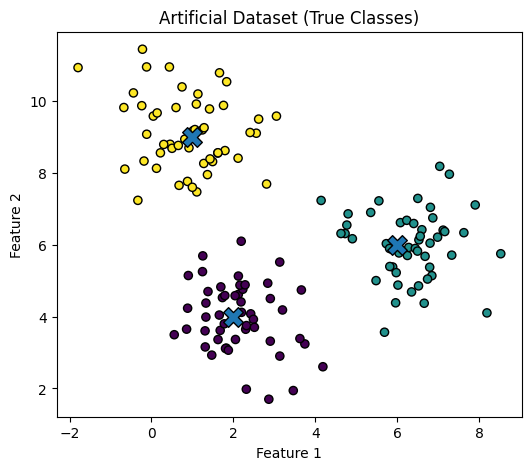

In [21]:
# --- Plot 1: True classes
plt.figure(figsize=(6,5))
plt.scatter(dataset[:,0], dataset[:,1], c=labels, s=35, edgecolor='k')
plt.scatter(np.array(centers)[:,0], np.array(centers)[:,1],
            marker='X', s=200, edgecolor='k')
plt.title("Artificial Dataset (True Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

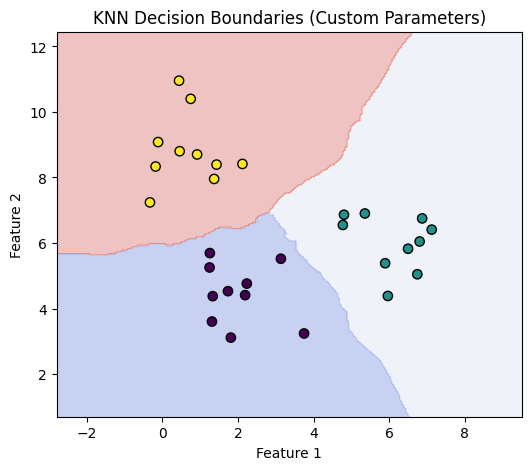

In [39]:
# --- Decision Boundary for KNN with specific parameters (knn2)
h = 0.05  # step size in mesh

# Set limits for the grid
x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the grid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(test_data[:,0], test_data[:,1], c=test_pred, s=45, edgecolor='k')
plt.title("KNN Decision Boundaries (Custom Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Confusion **Matrix**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import pandas as pd

# --- Confusion Matrix
cm = confusion_matrix(test_labels, test_pred)

# Convert to DataFrame for nicer table display
cm_df = pd.DataFrame(cm,
                     index=[f"Actual {i}" for i in np.unique(labels)],
                     columns=[f"Pred {i}" for i in np.unique(labels)])

print("Confusion Matrix (table form):\n")
print(cm_df)



Confusion Matrix (table form):

          Pred 0  Pred 1  Pred 2
Actual 0      10       0       0
Actual 1       0      10       0
Actual 2       0       0      10


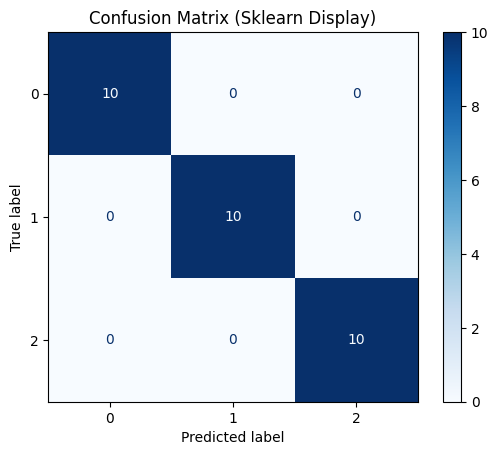

In [31]:
# --- Visualization with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Sklearn Display)")
plt.show()



**Training the KNN with no parameters ( Default )**

In [25]:
knn_default = KNeighborsClassifier()
knn_default.fit(train_data, train_labels)

KNeighborsClassifier()

**Predictions**

In [26]:
train_pred_default = knn_default.predict(train_data)
test_pred_default = knn_default.predict(test_data)

In [27]:
print("Train Accuracy (Default KNN):", round(accuracy_score(train_labels, train_pred_default), 3))
print("Test  Accuracy (Default KNN):", round(accuracy_score(test_labels, test_pred_default), 3))

Train Accuracy (Default KNN): 1.0
Test  Accuracy (Default KNN): 1.0


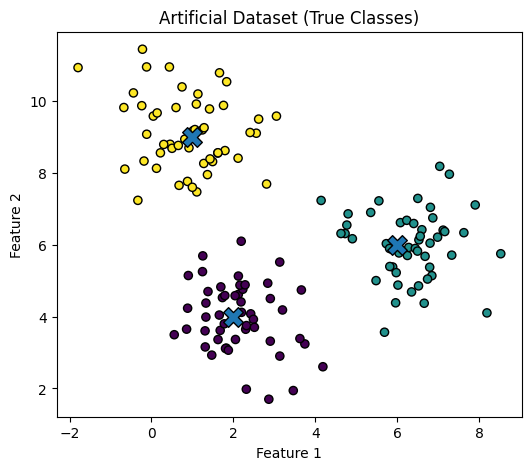

In [40]:
# --- Plot 1: Artificial Dataset (True Classes)
plt.figure(figsize=(6,5))
plt.scatter(dataset[:,0], dataset[:,1], c=labels, s=35, edgecolor='k')
plt.scatter(np.array(centers)[:,0], np.array(centers)[:,1],
            marker='X', s=200, edgecolor='k')
plt.title("Artificial Dataset (True Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


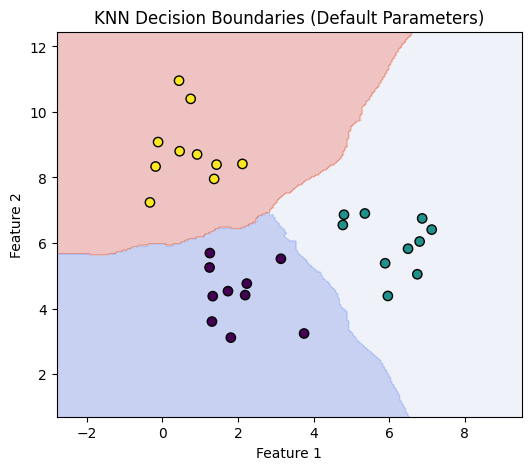

In [41]:
cm_default = confusion_matrix(test_labels, test_pred_default)
cm_default_df = pd.DataFrame(cm_default,
                     index=[f"Actual {i}" for i in np.unique(train_labels)],
                     columns=[f"Pred {i}" for i in np.unique(train_labels)])

# --- Decision Boundary for Default KNN
h = 0.05  # step size in mesh
x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_default.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(test_data[:,0], test_data[:,1], c=test_pred_default, s=45, edgecolor='k')
plt.title("KNN Decision Boundaries (Default Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Confusion Matrix**

In [30]:
cm_default = confusion_matrix(test_labels, test_pred_default)
cm_df_default = pd.DataFrame(cm_default,
                     index=[f"Actual {i}" for i in np.unique(train_labels)],
                     columns=[f"Pred {i}" for i in np.unique(train_labels)])

print("\nConfusion Matrix (Default KNN):\n", cm_df_default)


Confusion Matrix (Default KNN):
           Pred 0  Pred 1  Pred 2
Actual 0      10       0       0
Actual 1       0      10       0
Actual 2       0       0      10


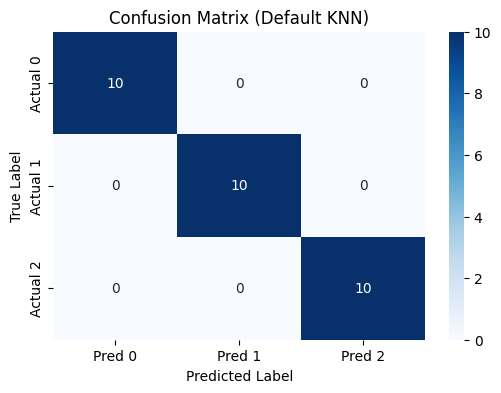

In [29]:
# --- Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_df_default, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Default KNN)")
plt.show()

**Visualisations comparing two KNN models**

In [35]:
cm_default = confusion_matrix(test_labels, test_pred_default)
cm_param   = confusion_matrix(test_labels, test_pred)

cm_default_df = pd.DataFrame(cm_default,
    index=[f"Actual {i}" for i in np.unique(train_labels)],
    columns=[f"Pred {i}" for i in np.unique(train_labels)]
)

cm_param_df = pd.DataFrame(cm_param,
    index=[f"Actual {i}" for i in np.unique(train_labels)],
    columns=[f"Pred {i}" for i in np.unique(train_labels)]
)

print("\n=== Confusion Matrix (Default KNN) ===\n", cm_default_df)
print("\n=== Confusion Matrix (Custom KNN) ===\n", cm_param_df)




=== Confusion Matrix (Default KNN) ===
           Pred 0  Pred 1  Pred 2
Actual 0      10       0       0
Actual 1       0      10       0
Actual 2       0       0      10

=== Confusion Matrix (Custom KNN) ===
           Pred 0  Pred 1  Pred 2
Actual 0      10       0       0
Actual 1       0      10       0
Actual 2       0       0      10


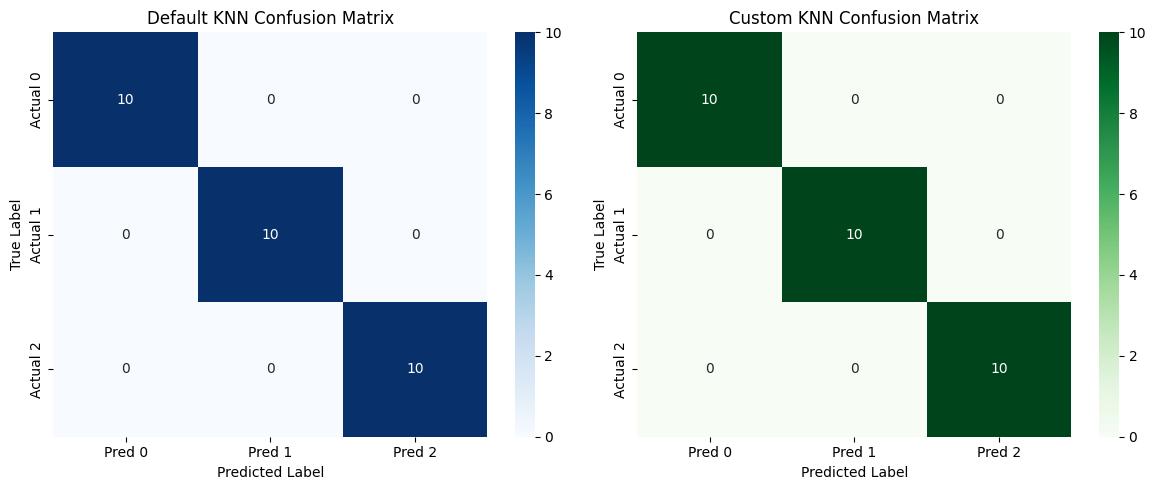

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_default_df, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Default KNN Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_param_df, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Custom KNN Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

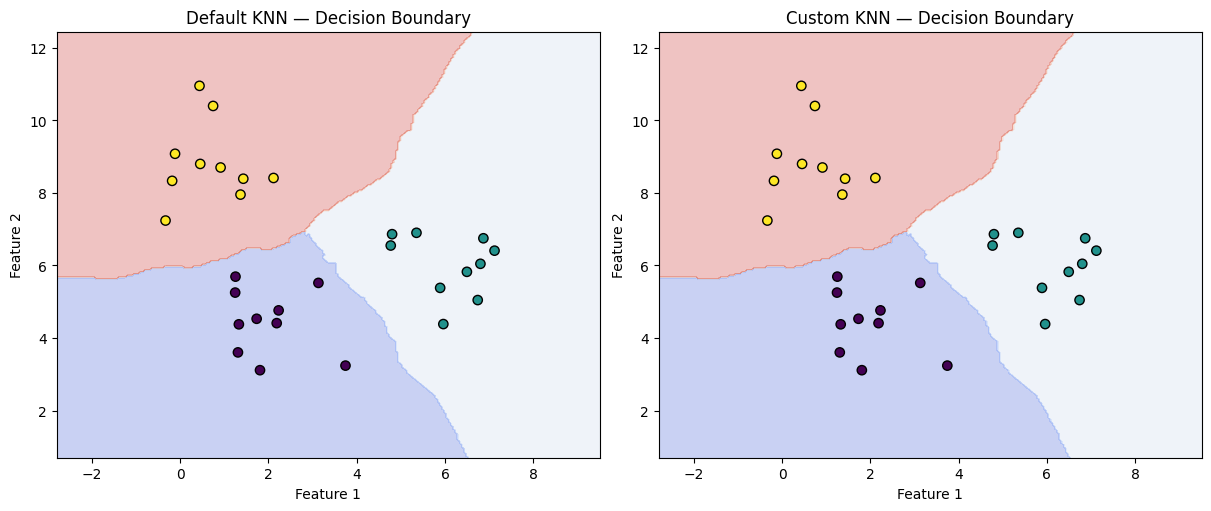

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(ax, model, X_train, X_test, y_pred_test, title, h=0.05):
    # Grid limits based on TRAIN set (stable across models)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    # Mesh grid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # Predict over grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Background decision regions
    cs = ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

    # Test points colored by predicted class
    sc = ax.scatter(X_test[:, 0], X_test[:, 1],
                    c=y_pred_test, s=45, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# --- Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

plot_decision_boundary(
    axes[0], knn_default, train_data, test_data, test_pred_default,
    title="Default KNN — Decision Boundary"
)

plot_decision_boundary(
    axes[1], knn2, train_data, test_data, test_pred,
    title="Custom KNN — Decision Boundary"
)

plt.show()
